In [1]:
# Auto reload library
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
import pandas as pd
from util import data_process_records

## Dataset

In [35]:
data = pd.read_csv("data/processed_all.csv")
print(data.shape[0], "unique records with", data.shape[1], "fields.")
print("Date ranges between ", data.date.min(), "and", data.date.max(), "with", len(data.date.unique()), "unique days.")
print("Total of", len(data.optionid.unique()), "unique options. On average, each option has", data.groupby("optionid").size().mean(), "records.")
data.tail()

5208642 unique records with 19 fields.
Date ranges between  1996-01-04 and 2020-12-30 with 6292 unique days.
Total of 132409 unique options. On average, each option has 39.337522373856764 records.


,Unnamed: 0,optionid,date,time_to_maturity,strike_price,best_bid,best_offer,open_interest,delta,gamma,vega,theta,spot,spot_return,VIX,impl_volatility,ttm_yr,optionid_chg,impvol_chg
5208637,9635448,135757541,2020-11-03,409.0,3975.0,63.3,67.1,30.0,0.196262,0.000423,978.8297,-70.46168,3369.159912,0.017643,35.549999,0.182589,1.623016,0.0,0.007816
5208638,9643318,135757541,2020-11-04,408.0,3975.0,61.0,90.1,30.0,0.221022,0.000456,1071.0920,-74.41212,3443.439941,0.021808,29.570000,0.177826,1.619048,0.0,-0.026086
5208639,9650323,135757541,2020-11-05,407.0,3975.0,92.6,100.0,30.0,0.258562,0.000475,1186.9940,-84.07771,3510.449951,0.019273,27.580000,0.182156,1.615079,0.0,0.024350
5208640,9657695,135757541,2020-11-06,406.0,3975.0,89.4,93.0,57.0,0.252089,0.000480,1169.8420,-81.19736,3509.439941,-0.000288,24.860001,0.178211,1.611111,0.0,-0.021657
5208641,9665323,135757541,2020-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data = data_process_records(data)
print(data.shape[0], "unique records with", data.shape[1], "fields.")
print("Date ranges between ", data.date.min(), "and", data.date.max(), "with", len(data.date.unique()), "unique days.")
print("Total of", len(data.optionid.unique()), "unique options. On average, each option has", data.groupby("optionid").size().mean(), "records.")
data.to_csv("data/features.csv", index=False)
data.tail()

5076232 unique records with 7 fields.
Date ranges between  1996-01-05 and 2020-12-30 with 6291 unique days.
Total of 125958 unique options. On average, each option has 40.30098921862843 records.


,date,optionid,iv,time_to_maturity,moneyness,moneyness_5,moneyness_20
5076227,2020-11-02,135757541,0.181173,410.0,-705.040039,-650.917393,-583.771588
5076228,2020-11-03,135757541,0.182589,409.0,-664.760010,-655.531599,-591.484771
5076229,2020-11-04,135757541,0.177826,408.0,-605.840088,-638.967762,-592.851944
5076230,2020-11-05,135757541,0.182156,407.0,-531.560059,-603.165194,-587.014622
5076231,2020-11-06,135757541,0.178211,406.0,-464.550049,-556.960146,-575.351329


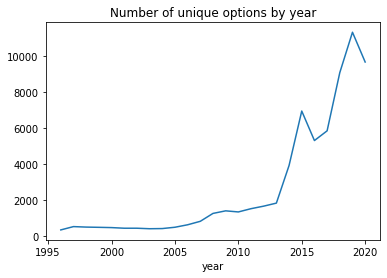

In [5]:
data['year'] = pd.DatetimeIndex(data["date"]).year
data.groupby('year')['optionid'].nunique().plot(title="Number of unique options by year")
data = data.drop(columns=['year'])

In [6]:
data.dtypes

date                 object
optionid              int64
time_to_maturity    float64
strike_price        float64
best_bid            float64
best_offer          float64
open_interest       float64
spot                float64
VIX                 float64
impl_volatility     float64
impvol_chg          float64
dtype: object

## Modeling

In [8]:
from util import split_train_test

In [9]:
train, test = split_train_test(data, 0.9)

In [10]:
print(len(train.optionid.unique()), "training samples and", len(test.optionid.unique()), "testing samples.")

45349 training samples and 5039 testing samples.


In [11]:
train.tail()

,date,optionid,time_to_maturity,strike_price,best_bid,best_offer,open_interest,spot,VIX,impl_volatility,impvol_chg
3827717,2020-11-02,135757541,410.0,3975.0,51.8,54.7,30.0,3310.239990,37.130001,0.181173,-0.014839
3827718,2020-11-03,135757541,409.0,3975.0,63.3,67.1,30.0,3369.159912,35.549999,0.182589,0.007816
3827719,2020-11-04,135757541,408.0,3975.0,61.0,90.1,30.0,3443.439941,29.570000,0.177826,-0.026086
3827720,2020-11-05,135757541,407.0,3975.0,92.6,100.0,30.0,3510.449951,27.580000,0.182156,0.024350
3827721,2020-11-06,135757541,406.0,3975.0,89.4,93.0,57.0,3509.439941,24.860001,0.178211,-0.021657


In [12]:
test.tail()

,date,optionid,time_to_maturity,strike_price,best_bid,best_offer,open_interest,spot,VIX,impl_volatility,impvol_chg
435127,2020-12-23,135757540,359.0,3950.0,144.4,148.0,2199.0,3690.010010,23.309999,0.182519,-0.011883
435128,2020-12-24,135757540,358.0,3950.0,145.3,148.9,2269.0,3703.060059,21.530001,0.180142,-0.013023
435129,2020-12-28,135757540,354.0,3950.0,159.1,161.9,2289.0,3735.360107,21.700001,0.182153,0.011163
435130,2020-12-29,135757540,353.0,3950.0,160.5,164.9,2281.0,3727.040039,23.080000,0.186369,0.023145
435131,2020-12-30,135757540,352.0,3950.0,161.2,164.7,2281.0,3732.040039,22.770000,0.185401,-0.005194
